11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.3904 - val_loss: 0.1896
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1802 - val_loss: 0.1534
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.1487 - val_loss: 0.1336
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1315 - val_loss: 0.1209
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1201 - val_loss: 0.1126
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1124 - val_loss: 0.1070
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1071 - val_loss: 0.1029
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1031 - val_loss: 0.0996
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1003 - val_loss: 0.0973
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0982 - val_loss: 0.0957
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


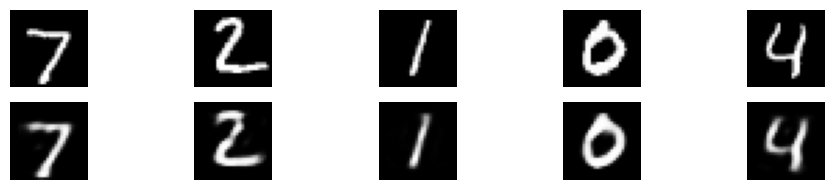

In [1]:
# Deep Learning Assignment
# Author: Arvind
# University: University of Central Missouri

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from sklearn.metrics import confusion_matrix, classification_report
import string
import random

# Q1: Basic Autoencoder
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Encoder-Decoder Architecture
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Plot original vs reconstructed
decoded_imgs = autoencoder.predict(x_test)
plt.figure(figsize=(10, 2))
for i in range(5):
    # original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis("off")
    # reconstructed
    ax = plt.subplot(2, 5, i + 6)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis("off")
plt.tight_layout()
plt.savefig("q1_reconstruction.png")